In [11]:
import numpy as np
import scipy.stats as stats
import pylab as pl
import pandas as pd
%matplotlib inline

# Running a T-Test

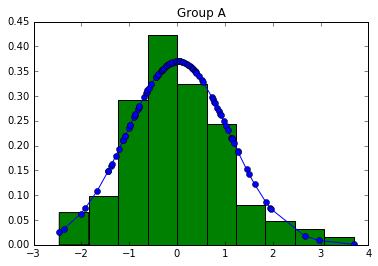

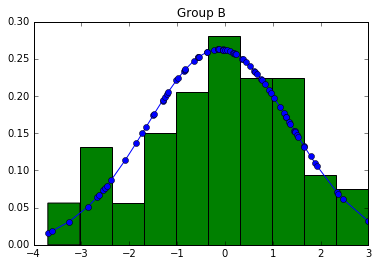

Ttest_indResult(statistic=0.69880516511943469, pvalue=0.48558583698269486)

In [8]:
# Generate data
a = sorted(np.random.randn(100)) 

# We do have more than 30 samples, but we don't know the standard deviation, so we need to do a t-test

b = sorted(np.random.randn(1) * np.random.randn(80))

# Plot distribution of A
fit = stats.norm.pdf(a, np.mean(a), np.std(a))
pl.plot(a,fit,'-o')
pl.hist(a,normed=True) 
pl.title('Group A')
pl.show()

# Plot distribution of B
fit = stats.norm.pdf(b, np.mean(b), np.std(b))
pl.plot(b,fit,'-o')
pl.hist(b,normed=True) 
pl.title('Group B')
pl.show()

# Perform T-test
stats.ttest_ind(a, b)


# Running a Z-Test

In [9]:
def ztest(x1, n1, x2, n2, one_tailed=False):
    """
    One- or Two-Tailed Z-test for two samples
    
    Args:
        x1 = # of successes in Sample 1
        n1 = # of observations in Sample 1
        x2 = # of successes in Sample 2
        n2 = # of observations in Sample 2
        one_tailed = Boolean, whether or not the test should be One-Tailed
        
    Return:
        z = Z-stat
    """
    p1 = x1 / n1
    p2 = x2 / n2    
 
    p = (x1 + x2) / (n1 + n2)
    se = p * (1 - p) * ((1 / n1) + (1/ n2))
    sse = np.sqrt(se)
    
    z = (p1 - p2) / sse
    p = 1 - stats.norm.cdf(abs(z))
    
    if not one_tailed:
        p *= 2
        
    return z, p

In [33]:
# Do a test with fake data:

control_observations = 3141.0 #n1
control_successes = 1904.0 # x1
test_observations = 3241.0 #n2
test_successes = 2134.0 #x2

ztest(control_successes, control_observations, test_successes, test_observations, one_tailed=False)

(-4.3299120715441166, 1.4916889162330804e-05)

In [13]:
data = pd.read_csv('../../../../week-08/4.2-lab/assets/datasets/CTR_sim.csv')

In [14]:
data.head()

,Clicks Conv,Clicks,Weekend
0,11,19,0
1,10,20,0
2,11,17,0
3,15,14,0
4,11,18,0


In [15]:
data.shape

(1000, 3)

In [24]:
weekend = data[data['Weekend'] ==1]
weekday = data[data['Weekend'] ==0]

In [28]:
# Perform T-test since we don't know the standard deviation
print stats.ttest_ind(weekend.Clicks, weekday.Clicks) # No significant difference between clicks on weekday or weekend

Ttest_indResult(statistic=0.79435748920170013, pvalue=0.42717619123792239)


In [29]:
print stats.ttest_ind(weekend['Clicks Conv'], weekday['Clicks Conv']) # Major difference between the 

Ttest_indResult(statistic=36.188754454063677, pvalue=7.4394925319067849e-184)


In [31]:
import statsmodels.stats.weightstats as ws

In [32]:
print ws.ttest_ind(weekend['Clicks Conv'], weekday['Clicks Conv']) # Major difference between the 

(36.188754454063684, 7.4394925319067849e-184, 998.0)
